In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import plotly.express as px

In [102]:
df = pd.read_csv('Live.csv', encoding='latin1')
df.head()

,ï»¿status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [103]:
df['status_published'] = pd.to_datetime(df['status_published'])

In [104]:
def expand_df(df):
    data = df.copy()
    
    data['day'] = data.status_published.dt.day
    data['month'] = data.status_published.dt.month
    data['year'] = data.status_published.dt.year
    data['date'] = data.status_published.dt.date

    return data

df = expand_df(df)
display(df)

,ï»¿status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4,day,month,year,date
0,246675545449582_1649696485147474,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN,22,4,2018,2018-04-22
1,246675545449582_1649426988507757,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN,21,4,2018,2018-04-21
2,246675545449582_1648730588577397,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN,21,4,2018,2018-04-21
3,246675545449582_1648576705259452,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN,21,4,2018,2018-04-21
4,246675545449582_1645700502213739,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN,18,4,2018,2018-04-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,2016-09-24 02:58:00,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN,24,9,2016,2016-09-24
7046,1050855161656896_1061334757275603,photo,2016-09-23 11:19:00,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN,23,9,2016,2016-09-23
7047,1050855161656896_1060126464063099,photo,2016-09-21 23:03:00,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN,21,9,2016,2016-09-21
7048,1050855161656896_1058663487542730,photo,2016-09-20 00:43:00,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN,20,9,2016,2016-09-20


In [105]:
df.dtypes

ï»¿status_id                object
status_type                 object
status_published    datetime64[ns]
num_reactions                int64
num_comments                 int64
num_shares                   int64
num_likes                    int64
num_loves                    int64
num_wows                     int64
num_hahas                    int64
num_sads                     int64
num_angrys                   int64
Column1                    float64
Column2                    float64
Column3                    float64
Column4                    float64
day                          int64
month                        int64
year                         int64
date                        object
dtype: object

In [106]:
df.shape

(7050, 20)

### Imputación de Datos.

In [107]:
df.isnull().sum()

ï»¿status_id           0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
day                    0
month                  0
year                   0
date                   0
dtype: int64

In [108]:
df.drop(['ï»¿status_id', 'Column1', 'Column2', 'Column3', 'Column4', 'day', 'month', 'year'], axis=1, inplace=True)

In [109]:
df.isnull().sum()

status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
date                0
dtype: int64

In [110]:
df.dropna(axis=0, inplace=True)
df.shape

(7050, 12)

In [111]:
df.columns

Index(['status_type', 'status_published', 'num_reactions', 'num_comments',
       'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas',
       'num_sads', 'num_angrys', 'date'],
      dtype='object')

In [112]:
df.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,date
0,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,2018-04-22
1,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,2018-04-21
2,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,2018-04-21
3,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,2018-04-21
4,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,2018-04-18


## Analisis Exploratorio

In [113]:
df.num_reactions.describe()

count    7050.000000
mean      230.117163
std       462.625309
min         0.000000
25%        17.000000
50%        59.500000
75%       219.000000
max      4710.000000
Name: num_reactions, dtype: float64

In [114]:
df.num_comments.describe()

count     7050.000000
mean       224.356028
std        889.636820
min          0.000000
25%          0.000000
50%          4.000000
75%         23.000000
max      20990.000000
Name: num_comments, dtype: float64

In [115]:
df.num_shares.describe()

count    7050.000000
mean       40.022553
std       131.599965
min         0.000000
25%         0.000000
50%         0.000000
75%         4.000000
max      3424.000000
Name: num_shares, dtype: float64

In [116]:
df.num_likes.describe()

count    7050.000000
mean      215.043121
std       449.472357
min         0.000000
25%        17.000000
50%        58.000000
75%       184.750000
max      4710.000000
Name: num_likes, dtype: float64

In [117]:
df.num_loves.describe()

count    7050.000000
mean       12.728652
std        39.972930
min         0.000000
25%         0.000000
50%         0.000000
75%         3.000000
max       657.000000
Name: num_loves, dtype: float64

In [118]:
df.num_wows.describe()

count    7050.000000
mean        1.289362
std         8.719650
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       278.000000
Name: num_wows, dtype: float64

In [119]:
df.num_hahas.describe()

count    7050.000000
mean        0.696454
std         3.957183
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       157.000000
Name: num_hahas, dtype: float64

In [120]:
df.num_sads.describe()

count    7050.000000
mean        0.243688
std         1.597156
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        51.000000
Name: num_sads, dtype: float64

In [121]:
df.num_angrys.describe()

count    7050.000000
mean        0.113191
std         0.726812
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        31.000000
Name: num_angrys, dtype: float64

### Series temporales

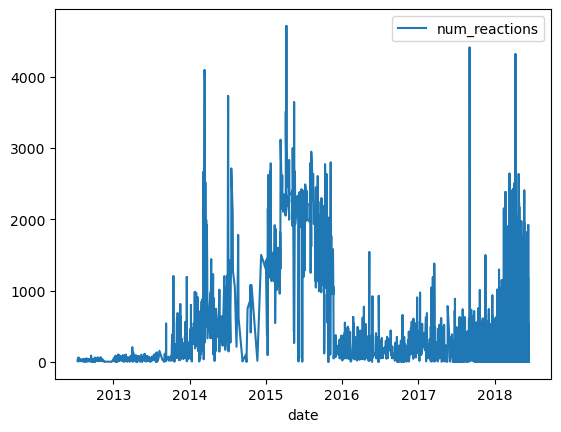

In [122]:
df.plot( 'date' , 'num_reactions',  ) 
plt.show()


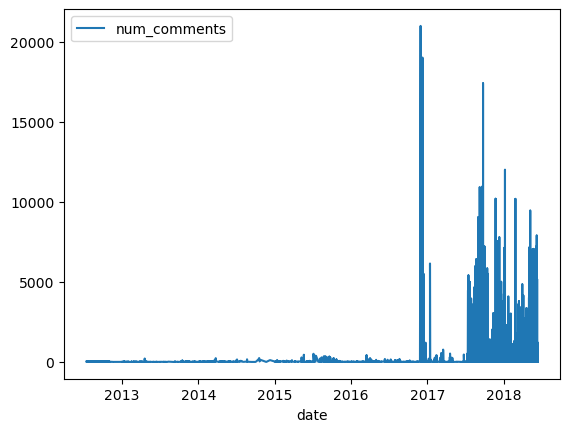

In [123]:
df.plot( 'date' , 'num_comments',  ) 
plt.show()


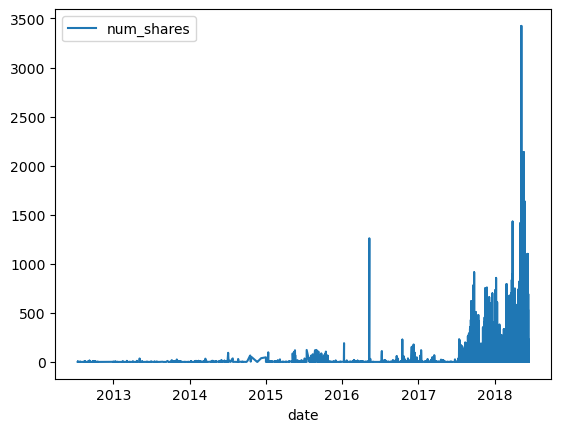

In [124]:
df.plot( 'date' , 'num_shares',  ) 
plt.show()

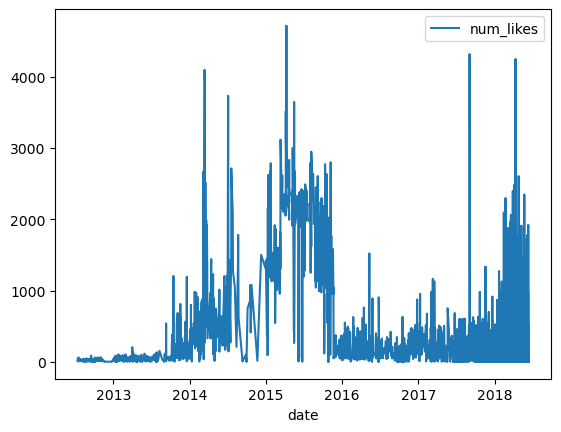

In [125]:
df.plot( 'date' , 'num_likes',  ) 
plt.show()

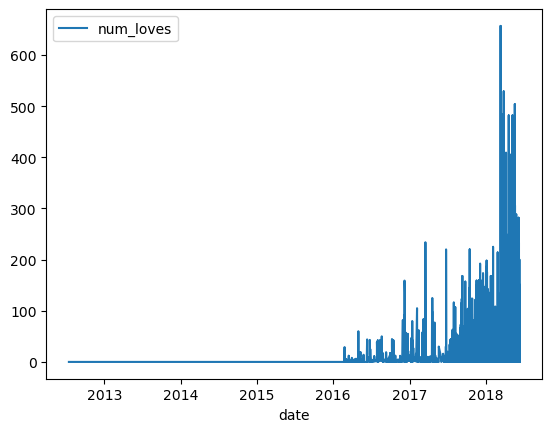

In [126]:
df.plot( 'date' , 'num_loves',  ) 
plt.show()

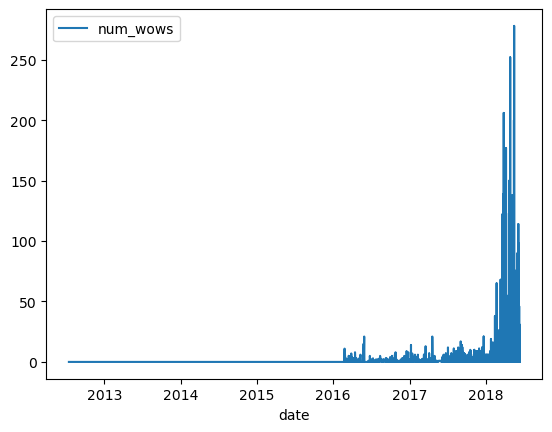

In [127]:
df.plot( 'date' , 'num_wows',  ) 
plt.show()

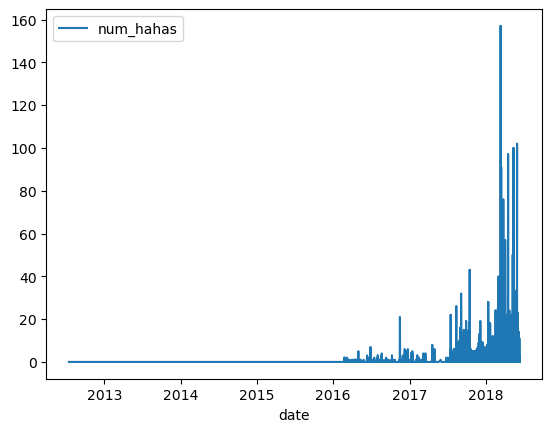

In [128]:
df.plot( 'date' , 'num_hahas',  ) 
plt.show()

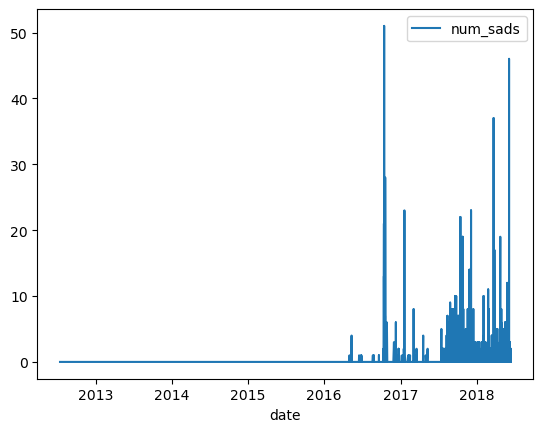

In [129]:
df.plot( 'date' , 'num_sads',  ) 
plt.show()

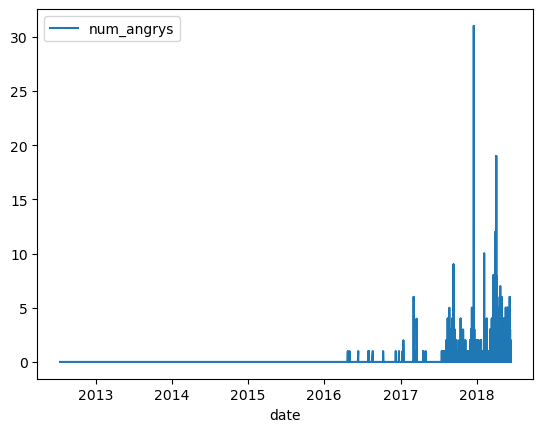

In [130]:
df.plot( 'date' , 'num_angrys',  ) 
plt.show()

## Separar datos en x y Y

In [165]:
X = df[['num_comments','num_shares','num_likes','num_loves','num_wows','num_hahas','num_sads',	'num_angrys']]
y = df['status_type']

In [166]:
X

,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,512,262,432,92,3,1,1,0
1,0,0,150,0,0,0,0,0
2,236,57,204,21,1,1,0,0
3,0,0,111,0,0,0,0,0
4,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...
7045,0,0,89,0,0,0,0,0
7046,0,0,14,1,0,1,0,0
7047,0,0,1,1,0,0,0,0
7048,12,22,349,2,0,0,0,0


In [169]:
X.dtypes



num_comments    int64
num_shares      int64
num_likes       int64
num_loves       int64
num_wows        int64
num_hahas       int64
num_sads        int64
num_angrys      int64
dtype: object

In [132]:
df.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,date
0,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,2018-04-22
1,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,2018-04-21
2,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,2018-04-21
3,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,2018-04-21
4,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,2018-04-18


## Ingeniería de características

In [133]:
def executeFreqEncoding(df, map_type='freq'):
    colnames = df.columns
    for col in colnames:
        if(df[col].dtype == 'object'):
            factor_div = 1 if (map_type == 'freq') else len(df[col])
            mapper = (df[col].value_counts().sort_values(ascending=False)/factor_div).to_dict()
            df[col] = df[col].map(mapper) 

In [134]:
executeFreqEncoding (df)

In [135]:
df.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,date
0,2334.0,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,19.0
1,4288.0,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,17.0
2,2334.0,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,17.0
3,4288.0,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,17.0
4,4288.0,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,8.0


In [71]:
from sklearn.preprocessing import MinMaxScaler

In [73]:
scaler = MinMaxScaler()
scaler.fit(df)


TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[float64]'>, <class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[float64]'>)

### Codificación de Variables Catetgóricas

In [157]:
df['status_type'] = df['status_type'].astype('int').astype('category')




In [159]:
status_type_df = df.groupby('status_type').agg({'num_reactions': ['mean', 'sum', 'max']})
status_type_df = pd.DataFrame(status_type_df)
status_type_df.columns = ['Mean', 'Sum', 'Max']
status_type_df.head()

,Mean,Sum,Max
status_type,,,
63,370.142857,23319,2214
365,438.783562,160156,2799
2334,283.409597,661478,4094
4288,181.290345,777373,4710


### Estandarización de Variables

In [139]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(status_type_df.values)
scaled_features

array([[ 0.53653122, -1.1938852 , -1.24748128],
       [ 1.24837   , -0.76651482, -0.65907044],
       [-0.3629365 ,  0.79921793,  0.64348007],
       [-1.42196473,  1.16118209,  1.26307166]])

In [140]:
Ks = range(1, 5)
variabilidad = []

for k in Ks:
    model = KMeans(n_clusters=k)
    model.fit(scaled_features)
    variabilidad.append(model.inertia_)

C:\Users\karin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\karin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\karin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\karin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

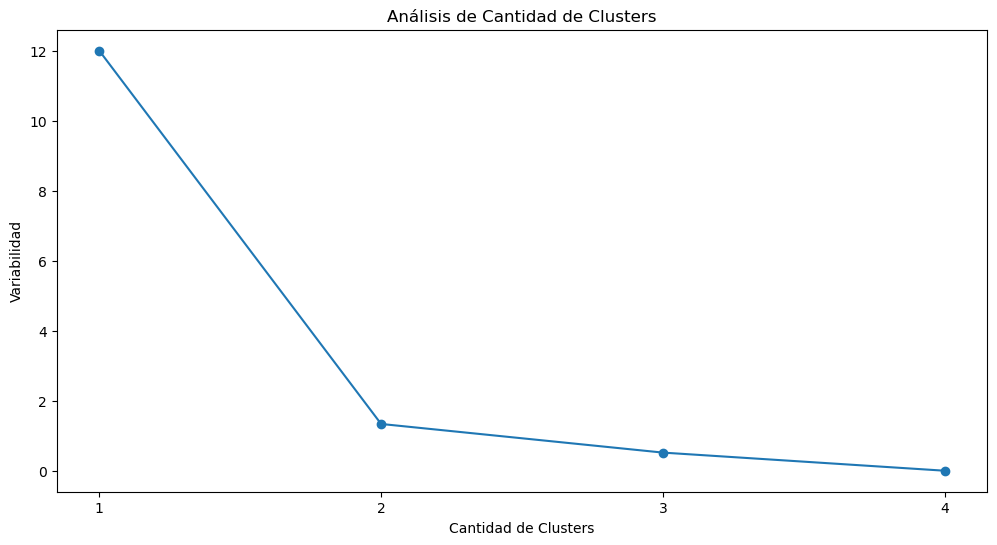

In [141]:
plt.figure(figsize=(12, 6))
plt.plot(Ks, variabilidad, '-o')
plt.title("Análisis de Cantidad de Clusters")
plt.xlabel("Cantidad de Clusters")
plt.ylabel("Variabilidad")
plt.xticks(Ks)
plt.show()

### Modelo KMeans con K = 3

In [142]:
MODEL = KMeans(n_clusters=3)
MODEL.fit(scaled_features)

C:\Users\karin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



KMeans(n_clusters=3)

In [143]:
status_type_df['Cluster'] = MODEL.predict(scaled_features)
status_type_df.head()

,Mean,Sum,Max,Cluster
status_type,,,,
63,370.142857,23319,2214,1
365,438.783562,160156,2799,1
2334,283.409597,661478,4094,0
4288,181.290345,777373,4710,2


In [144]:
fig = px.scatter_3d(data_frame=status_type_df, x='Max', y='Mean', z='Sum', color='Cluster')

In [145]:
fig.show()

### PCA

In [172]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(scaled_features)

pca.explained_variance_ratio_

pca =PCA(n_components=2)

pca.fit(scaled_features)

pca.transform(scaled_features)

array([[-1.72985183,  0.52549599],
       [-1.53501626, -0.46857335],
       [ 1.04806699, -0.2703341 ],
       [ 2.2168011 ,  0.21341145]])